<a href="https://colab.research.google.com/github/NID123-CH/DSR-40/blob/main/DSR_40_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict


from datetime import datetime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [ ]:
# prompt: read text file with pndas

import pandas as pd
data = pd.read_csv('AirPassengers.csv') # Adjust sep if needed



     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


<Axes: >

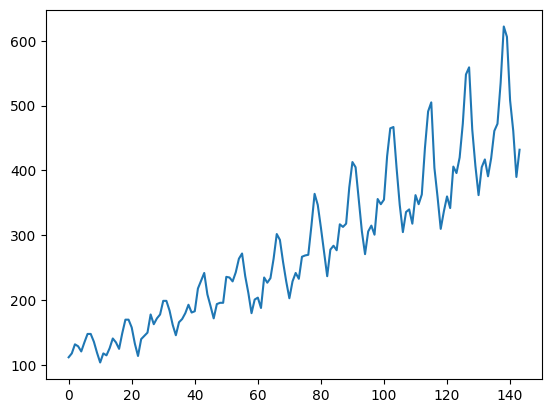

In [ ]:
data['#Passengers'].plot()

**Understanding ARIMA Parameters¶**

The key points to understand here are p, d, and q. Let's delve into their meanings: 👓

p: Autoregressive Order. This is the number of past observations considered for making future predictions. ⌛

q: Moving Average Order. It accounts for a specific number of previous residuals when making future predictions. 📊

d: Integration Order. It determines the number of differences needed to make the time series stationary (T(q) - T(q-1)).

**Finding d¶**

ARIMA models work with stationary data, where the mean and standard deviation remain relatively constant over time.

We will use Augmented Dickey-Fuller (ADF) test, a common statistical test used to determine whether a given time series is stationary or not

If data fail the test (p > .05), then we will perform difference operation on data.

We will keep on doing differencing till our data pass ADF.

Number of time we perform the differencing, will be the value of Integration Order (d)

In [ ]:
d = 0
p_value = adfuller(data['#Passengers'])[1]
diff_data = data['#Passengers']

while p_value > 0.05:
    diff_data = diff_data.diff()
    p_value = adfuller(diff_data.dropna())[1]
    d += 1


print(f'P Value: {p_value}\t Number of differencing needed: {d}')

P Value: 2.7328918500142026e-29	 Number of differencing needed: 2


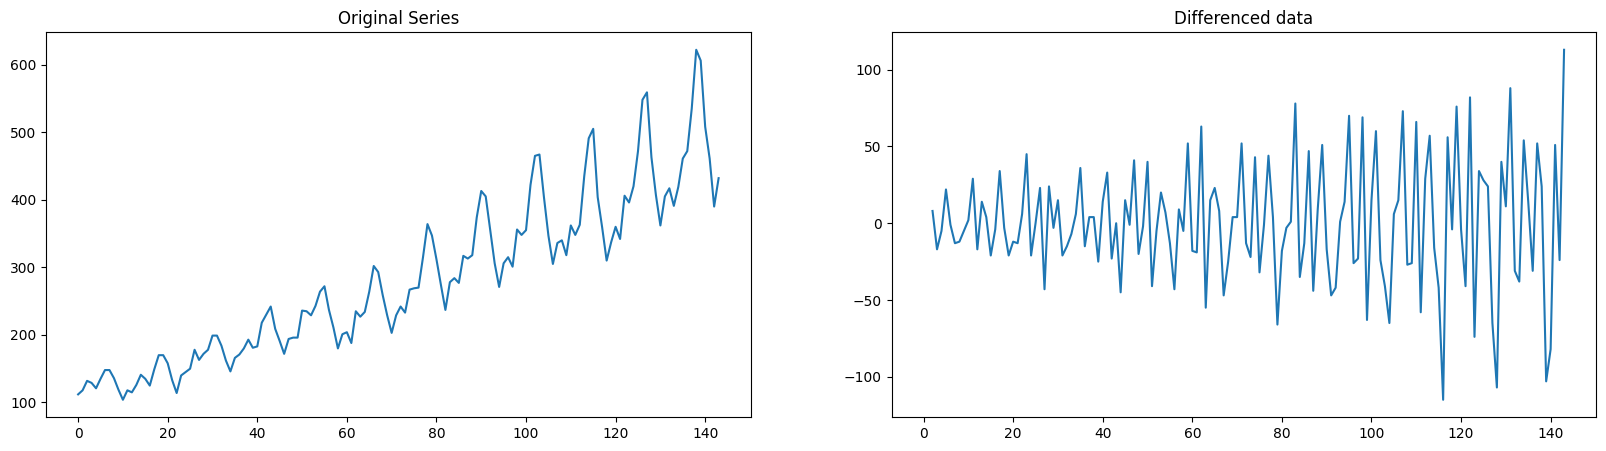

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
axes[0].plot(data['#Passengers']); axes[0].set_title('Original Series')
axes[1].plot(diff_data); axes[1].set_title('Differenced data')
plt.show()

We can see that data look stationary now, as values are euqally distributed around zero. So we can proceed ahead.

d = 2

**Finding p¶**

We will use Partial Autocorrelation (PACF) plot.

Partial Autocorrelation, is the correlation between current value and a particular value in past, ignoring all values in between.

We can use PACF graph to find the last significat lag that is above the threshold area.

Number of lags between that last and first lag is the, value of AR (p).

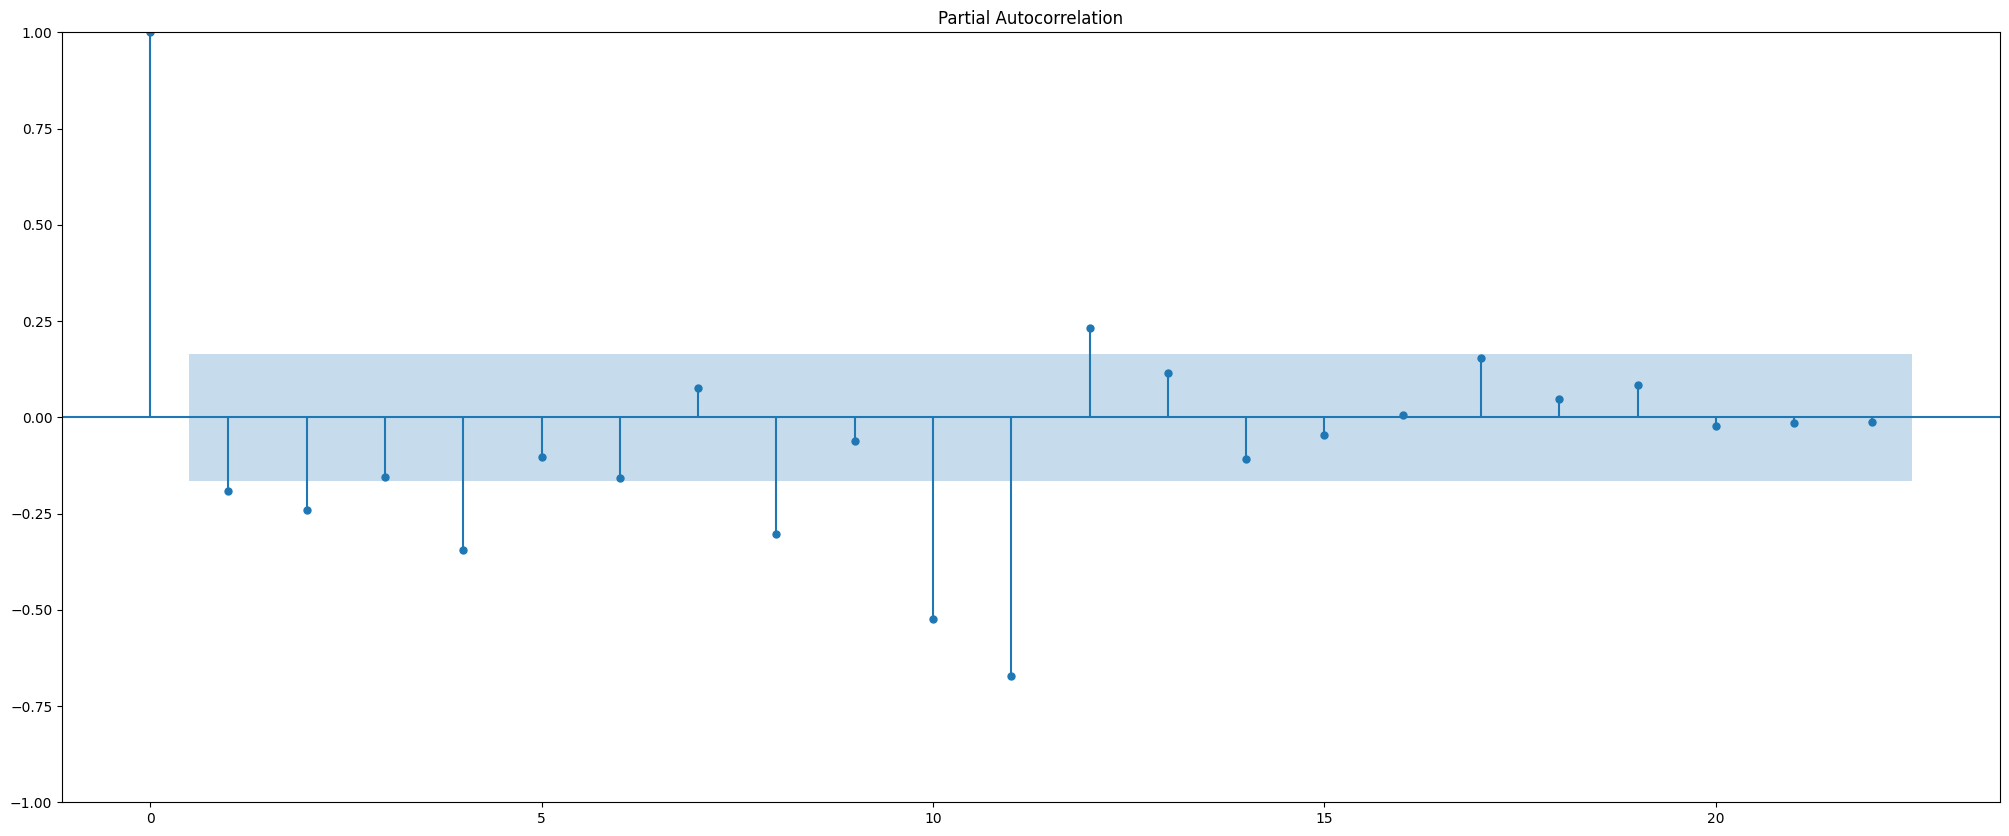

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_pacf(diff_data.dropna(), ax=ax)
plt.show()

Last significat lag is 11, so value of p = 11

**Finding q**

We will use Autocorrelation (PACF) plot.

Autocorrelation, is tells the number MA that should be removed so that there is no autocorrelation in the stationarized series.

Number of lags outside the threshold area is the, value of MR (q).

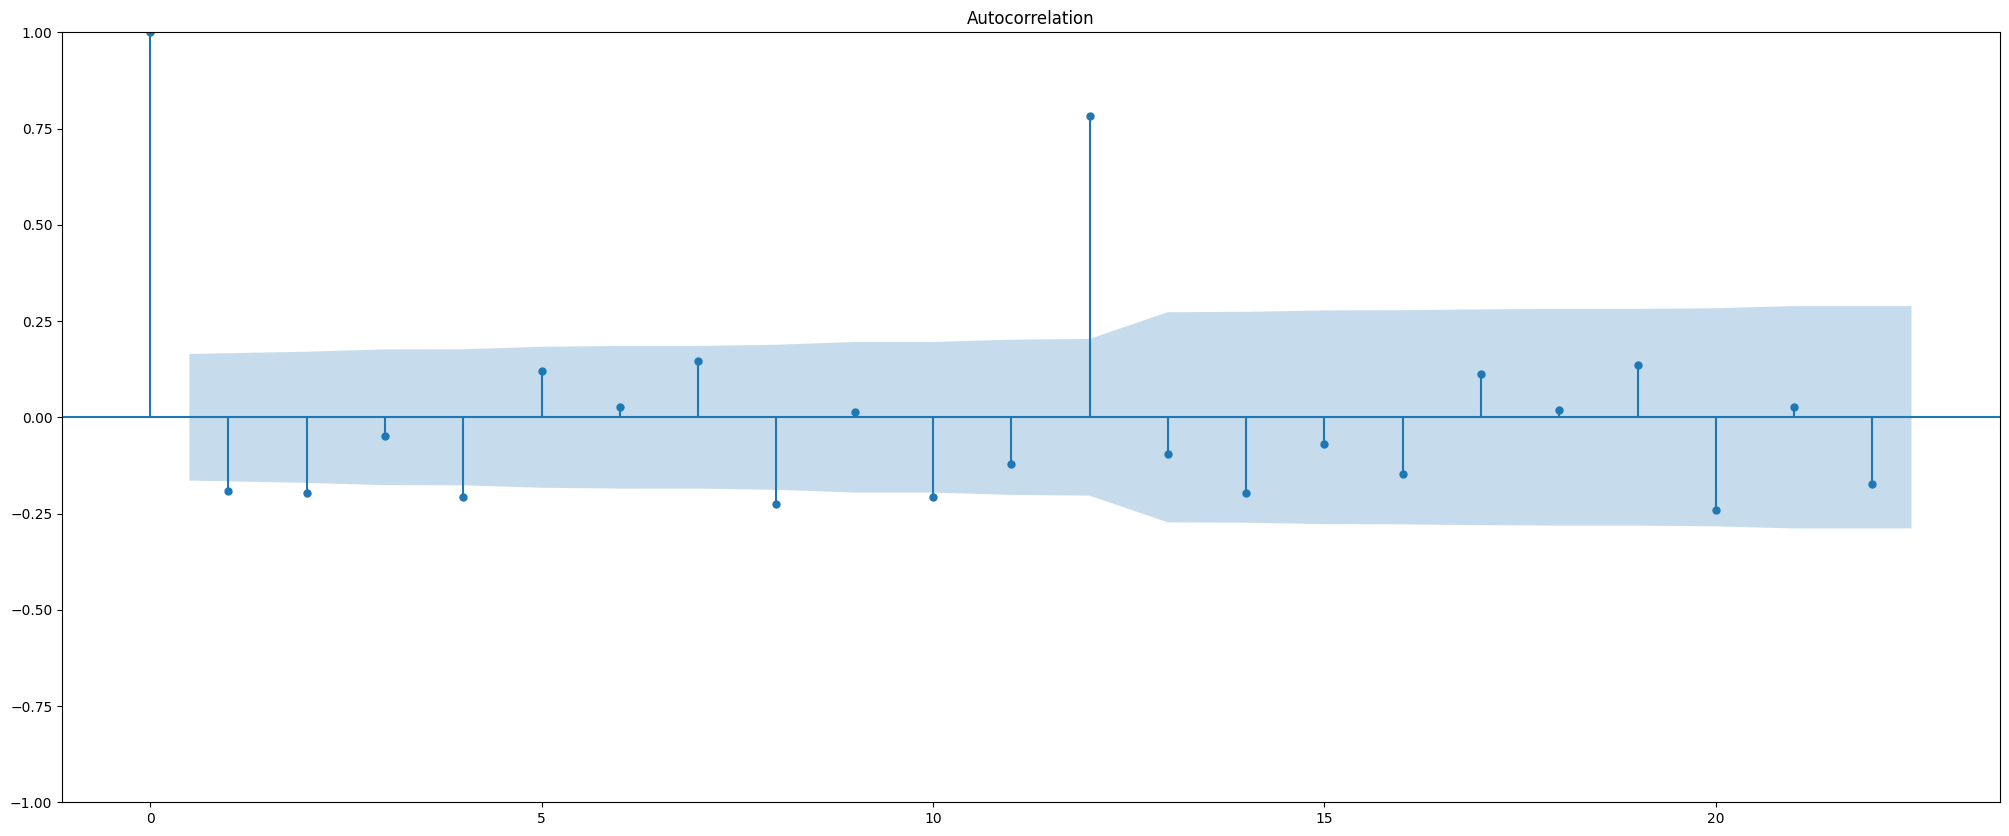

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_acf(diff_data.dropna(), ax=ax)
plt.show()

There is only one outside the area significantly, so value of q = 1

**Model**

In [ ]:
model = ARIMA(data['#Passengers'].values, order=(11,2,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                ARIMA(11, 2, 1)   Log Likelihood                -557.649
Date:                Mon, 30 Sep 2024   AIC                           1141.297
Time:                        09:42:45   BIC                           1179.723
Sample:                             0   HQIC                          1156.912
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8713      0.069    -12.641      0.000      -1.006      -0.736
ar.L2         -0.9382      0.044    -21.302      0.000      -1.025      -0.852
ar.L3         -0.9004      0.070    -12.876      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


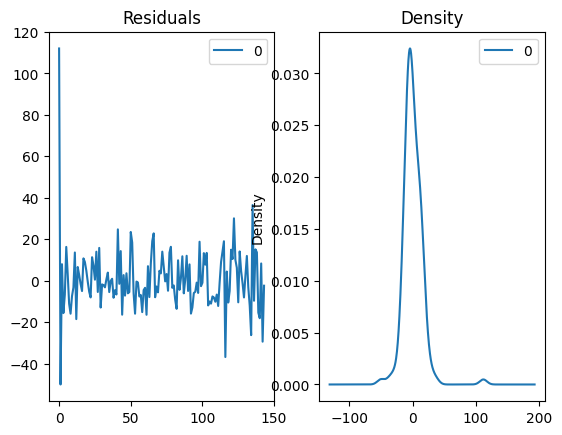

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residual graph is very favourable, as it is distrubited near zero. Concluding that the mean and variance is constant.

**Forecast**

0
143


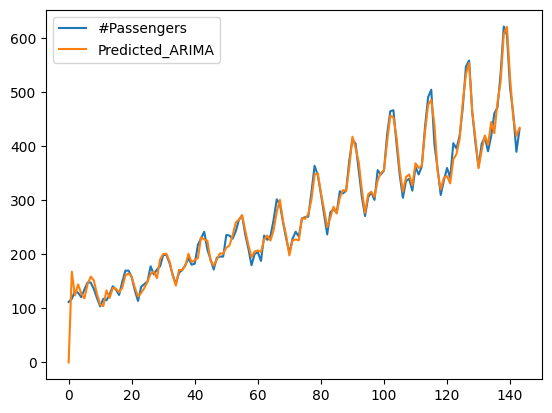

<Figure size 1000x600 with 0 Axes>

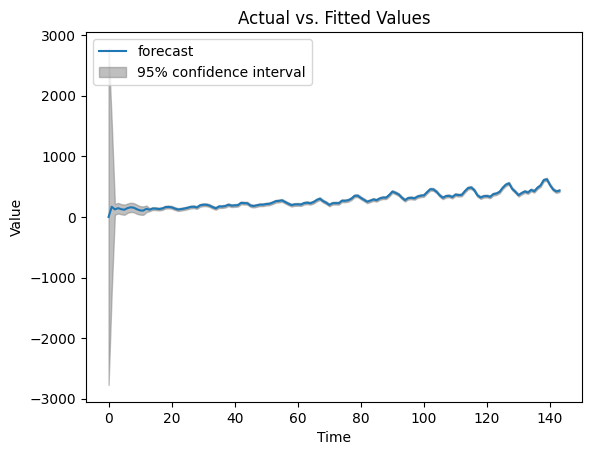

In [ ]:
##prediction
pred_start_date=data['Month'].index[0]
pred_end_date=data['Month'].index[-1]
print(pred_start_date)
print(pred_end_date)

pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
data['Predicted_ARIMA']=pred

data[['#Passengers','Predicted_ARIMA']].plot()

# Plot actual vs. fitted values
plt.figure(figsize=(10, 6))
plot_predict(model_fit, dynamic=False)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Fitted Values')
plt.legend(loc='upper left')
plt.show()

Most values are inside confidence interval, so we are good to forecast the data now

<Axes: >

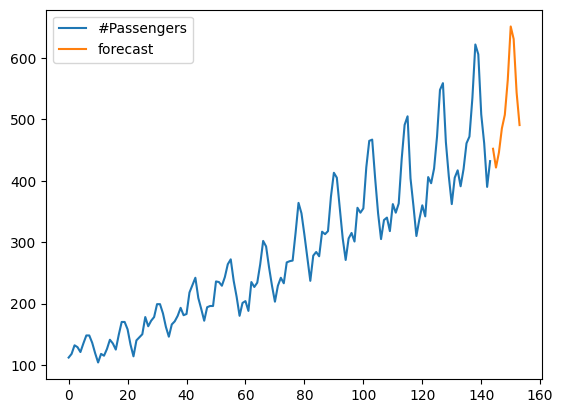

In [ ]:
# Define the number of steps to forecast
forecast_steps = 10

# Forecast future values
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of future dates
date_range = pd.date_range(start=data['Month'].iloc[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Month': date_range, 'forecast': forecast})

# Merge the forecasted values with the original data
data = pd.concat([data, forecast_df], ignore_index=True)

data[['#Passengers','forecast']].plot()